In [1]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import StandardScaler

In [2]:
# loading dataset
df = pd.read_csv("~/Desktop/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

In [3]:
# shape of dataset
df.shape

(891, 12)

In [4]:
# column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# looking at datatypes and null values of features
df.info()
# missing values are present in Age and embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

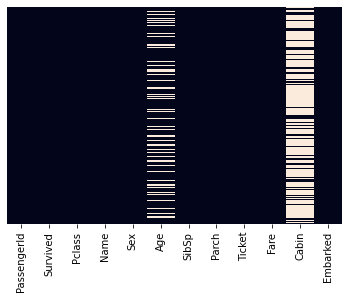

In [6]:
# visualizing missing values
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [7]:
# cabin has a lot of null values so removing it
df = df.drop(columns=['Cabin'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
# imputing Age column

outlier_indices = []
Q1 = np.percentile(df['Age'], 25) # 1st quartile
Q3 = np.percentile(df['Age'],75) # 3rd quartile 
IQR = Q3 - Q1   # Interquartile rrange (IQR)
outlier_bound = 1.5 * IQR # outlier step
        
# finding a list outliers
outlier_indices = df[(df["Age"] < (Q1 - outlier_bound)) | (df['Age'] > (Q3 + outlier_bound))].index
        
print(outlier_indices) 

Int64Index([], dtype='int64')


In [9]:
# since number of outliers are not present we can impute age with mean age
df.loc[df["Age"].isnull() == True, "Age"] = round(df["Age"].mean(),1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

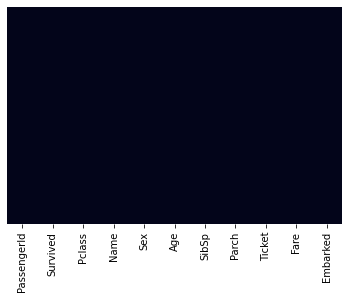

In [10]:
# missing values are imputed
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [11]:
# mapping sex feature to numerical values
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [12]:
# converting embark feature to numerical using one hot encoding
embarked = pd.get_dummies(df['Embarked'],drop_first = True)
df.drop(['Embarked'],axis=1,inplace = True) # dropping original Embarked feature form df
df = pd.concat([df,embarked],axis=1) # concatinating encoded embarked feature
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


In [13]:
# removing unwanted columns
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [14]:
# checking datatypes
df.info()
# all are valid datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 50.6 KB


In [15]:
df.describe()
# we need to scale our data as the ranges are not same

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699293,0.523008,0.381594,32.204208,0.086420,0.722783
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.700000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [16]:
from sklearn.preprocessing import MinMaxScaler

cols = list(df.columns)

scaler = MinMaxScaler()
df = scaler.fit_transform(df)

df = pd.DataFrame(df)
df.columns = cols
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0.0,1.0,0.0,0.271174,0.125,0.000000,0.014151,0.0,1.0
1,1.0,0.0,1.0,0.472229,0.125,0.000000,0.139136,0.0,0.0
2,1.0,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,1.0
3,1.0,0.0,1.0,0.434531,0.125,0.000000,0.103644,0.0,1.0
4,0.0,1.0,0.0,0.434531,0.000,0.000000,0.015713,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.334004,0.000,0.000000,0.025374,0.0,1.0
887,1.0,0.0,1.0,0.233476,0.000,0.000000,0.058556,0.0,1.0
888,0.0,1.0,1.0,0.367932,0.125,0.333333,0.045771,0.0,1.0
889,1.0,0.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,0.0


### Splitting data into train test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

### Performing Simulated Annaeling

In [18]:
# helper function for fitting and training the model using KFold cross validation and Random forest classifier
# using roc_auc curve as a performance metric

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def fit_model(X, y):
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train) # fitting the model
    
    predProb = model.predict_proba(X_test) # getting probabilities per row for each class
    
    # taking only the probability of 1 class
    # roc curve
    fpr, tpr, thresh = roc_curve(y_test, predProb[:,1], pos_label=1)
    
    # roc curve for random classifier 
    randomProbs = [0 for i in range(len(y_test))] # here threshold value is 0
    rFpr, rTpr,_ = roc_curve(y_test, randomProbs, pos_label=1)
    
    score = roc_auc_score(y_test, predProb[:,1])

    return [score,fpr,tpr,rFpr,rTpr]

In [25]:
T = 1
alpha =  0.95

# helper function to chk if all values in list l are less than val
def isValLess(l, val): 
    return(all(x < val for x in l)) 

# randomly selecting 50% of total existing features as the first set of initial feature set
numCols = set(np.arange(len(df.columns)))
currFeatureInd = set(random.sample(numCols,round(0.50*len(numCols))))
while(isValLess(currFeatureInd,8) == False): # to make sure column indices dont go out of bounds
    currFeatureInd = set(random.sample(numCols,round(0.50*len(numCols))))   
    
# selecting required columns from currFeatureInd in dataframe and training the model to get roc auc metric
xCurr = X_train.iloc[:, list(currFeatureInd)]
prevMetric = fit_model(xCurr, y_train)
# storing the score separately and other parameters separately
prevScore = prevMetric[0]
prevMetric = prevMetric[1:]

# storing the best feature subset, the best metric and the best max score
bestFeatureInd = xCurr 
maxMetric = prevMetric
maxScore = prevScore

hashTable = set() 
# hashTable keeping a track of various subsets o features formed so far so that subsets of features are never repeated

for i in range(30): # 30 iterations = termination condition

        # update current selected subset of features
        while True:
            if len(currFeatureInd) == len(numCols): # if all columns are in selected subset thn remove some
                nextAction = 'd'
            elif len(currFeatureInd) == 1: # if only 1 feature is currently selected thn add another
                nextAction = 'a'
            elif len(currFeatureInd) == 2: # if only 2 feature is currently selected thn add/replace another
                nextAction = random.choice(['a','r'])
            else: # if more than 2 present thn choose any of the following
                nextAction = random.choice(['a', 'r', 'd'])
            
            
            # implementing the changes
            leftCols = numCols.difference(currFeatureInd) # features not currenly selected
            newFeatureInd = currFeatureInd.copy()  # newSelectedFeatures to be performed

            if nextAction == 'a':   # add a feature index    
                newFeatureInd.add(random.choice(list(leftCols)))
            elif nextAction == 'd': # delete a feature index    
                newFeatureInd.remove(random.choice(list(currFeatureInd)))
            else: # remove an existing one and thn then add another feature index    
                newFeatureInd.remove(random.choice(list(currFeatureInd)))
                newFeatureInd.add(random.choice(list(leftCols)))
                
                
            # if same feature selected again, checking using hash table
            if newFeatureInd in hashTable:
                continue # if same feature selected again, repeat the while loop to get a new subset of feature
            if isValLess(newFeatureInd,8) == False:
                continue # ensuring column indices dont go out of bounds
            else: # else add to hashtable
                hashTable.add(frozenset(newFeatureInd))
                break
        
        xCurr = X_train.iloc[:,list(newFeatureInd)] # on the newly set of features formed again select the features and instances
        currMetric = fit_model(xCurr, y_train) # fit the selected data
        currScore = currMetric[0] # update the current score
        
        # now if newly formed score is better than prev one, thn update the current Metric, current score and the current set of features
        if currScore > prevScore:
            prevMetric = currMetric
            prevScore = currScore
            currFeatureInd = newFeatureInd.copy()
            if currScore > maxScore: # updating the maxMetric, maxScore so far
                maxMetric = currMetric
                maxScore = currScore
                bestFeatureInd = newFeatureInd.copy()
                
        else: # if newly formed score is not better then generate a random number
            r = np.random.uniform()
            diff = prevScore - currScore
            acceptProb = np.exp(diff / T)
            if r < acceptProb: 
                # if it is less than acceptance probability thn only we will consider the metrics 
                # i.e. this will be considered in the next iteration so we add it in the preMetric and score
                prevMetric = currMetric
                prevScore = currScore
                currFeatureInd = newFeatureInd.copy()
        
        # updating T = cooling the temperature
        # this method of updating alpha is called geometric reduction, 
        # where the temperature is scaled by a cooling factor alpha after each iteration. 
        # The alpha value can be set as 0.95.
        T = alpha * T
        

# at the end bestFeatureInd will contain the index of best features selected
bestCols = []
for i in bestFeatureInd:
    bestCols.append(X_train.columns[i]) # taking those columns
        
print(bestCols)
print(maxScore)
    

['Pclass', 'Sex', 'Age', 'Parch', 'Q']
0.8688767372977899


### Plotting the ROC-AUC curve

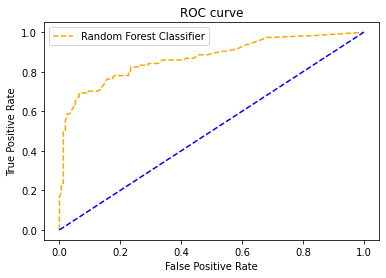

In [26]:
fpr = maxMetric[1]
tpr = maxMetric[2]
rFpr = maxMetric[3]
rTpr = maxMetric[4]

# plot roc curves
plt.plot(fpr, tpr, linestyle='--', color='orange', label='Random Forest Classifier')

# plot roc curve for random classifier
plt.plot(rFpr, rTpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive Rate')

plt.legend()
plt.show();

1. Simulated Annaeling is a non greedy approach of calculating global maxima and minima for an optimization functiion.
2. It is basically driven by randomness. 
3. Greedy approaches choose the best at each step of an algorithm hoping for a long term profit/cost. But here we also take a step/path/sebset which apparantly might not seem optimal or beneficial but may eventually lead us to a benefit in the long run.
4. Thus it easily escapes the local minima/maxima and reaches the global inima/maxima.
5. Here also initially when the temperature is high we accept feature sets having low roc_auc score, to see if by adding or removing more features to it we can get a better feature set or not. 
6. As the temperature cools down the probability to select such low scores also decreases.
7. We explore all possibilities of feature subsets and keep track of the maximum score received so far which we print along with the final feature set giving that score